## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
#print(mouse_metadata.dtype)

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
# Checks for the number of unique mice
total_unique_mice = combined_data["Mouse ID"].nunique(dropna = True) 
total_unique_mice

249

In [3]:
# Identify incomplete rows
combined_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
#len(duplicate_mice)
#print("Duplicate Rows based on Mouse ID and Timepoint are:",duplicate_mice)
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.sort_values('Mouse ID', ascending=False)
clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

In [7]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_data))

1888


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_group = clean_data.groupby("Drug Regimen")

mean_vol = regimen_group["Tumor Volume (mm3)"].mean()
median_vol = regimen_group["Tumor Volume (mm3)"].median()
var_vol = regimen_group["Tumor Volume (mm3)"].var()
std_vol = regimen_group["Tumor Volume (mm3)"].std()
sem_vol = regimen_group["Tumor Volume (mm3)"].sem()

summary_df=pd.DataFrame({"Mean Tumor Volume":mean_vol,
                        "Median Tumor Volume":median_vol,
                        "Tumor Volume Variance": var_vol,
                        "Tumor Volume Std. Dev.": std_vol,
                        "Tumor Volume Std. Err.":sem_vol})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
new_regimen_group = clean_data[["Drug Regimen",'Tumor Volume (mm3)']]
second_regimen_group = new_regimen_group.groupby("Drug Regimen")
second_regimen_group.describe()

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  156.0  52.393463  6.568014  45.000000  47.046068   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.909965  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen_data = clean_data
regimen_groups = regimen_data.groupby("Drug Regimen")
regimen_groups.head()

regimen = regimen_groups["Drug Regimen"].unique()
mice_count = regimen_groups["Mouse ID"].nunique(dropna = True)

mice_bar_df=pd.DataFrame({"Drug Regimen":regimen,
                         "Mice Count":mice_count})

mice_bar_key_df = mice_bar_df.set_index("Drug Regimen")

mice_bar_key_df

,Mice Count
Drug Regimen,
[Capomulin],25
[Ceftamin],25
[Infubinol],25
[Ketapril],25
[Naftisol],25
[Placebo],25
[Propriva],25
[Ramicane],25
[Stelasyn],24


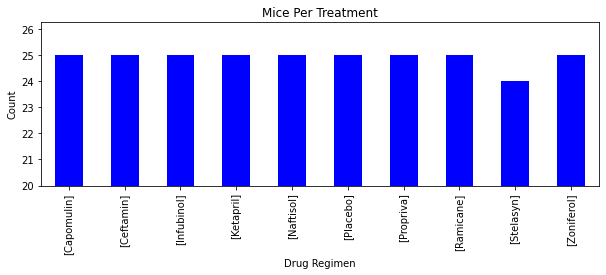

<Figure size 432x288 with 0 Axes>

In [11]:
# Use DataFrame.plot() in order to create a bar chart of the data using Pandas
mice_bar_key_df.plot(kind="bar", figsize=(10,3),color='b', legend=False)

# Set a title for the chart
plt.title("Mice Per Treatment")
plt.ylabel('Count')
plt.ylim(20)

plt.show()
plt.tight_layout()

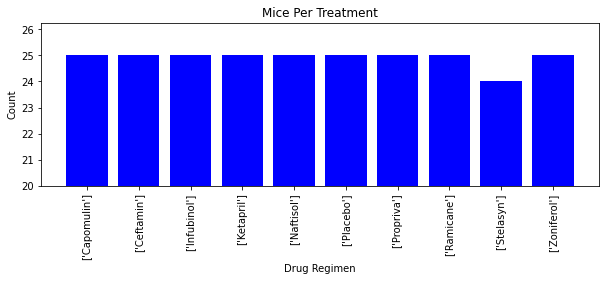

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(mice_bar_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,3))
plt.bar(x_axis, mice_bar_df["Mice Count"], color='b')
plt.xticks(tick_locations, mice_bar_df["Drug Regimen"], rotation="vertical")
plt.title("Mice Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.ylim(20)

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Percentages')

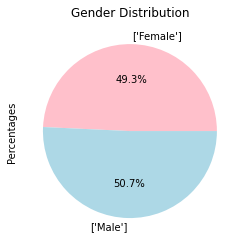

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = clean_data
gender_groups = gender_data.groupby("Sex")

gender = gender_groups["Sex"].unique()
gender_count = gender_groups["Sex"].count()
colors = ["pink","lightblue"]

gender_pie_df=pd.DataFrame({"Gender": gender,
                         "Count":gender_count})



gender_pie_df.plot(y="Count", kind="pie", labels=gender, colors=colors,
                        autopct="%1.1f%%", legend=False)
plt.title("Gender Distribution")
plt.ylabel('Percentages')

Text(0, 0.5, 'Percentages')

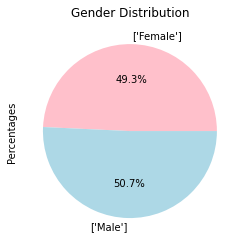

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, labels=gender, colors=colors,autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.ylabel('Percentages')


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Get the tumor volume at the last timepoint 
four_regimen_data = combined_data[combined_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

four_regimen_data_sorted = four_regimen_data.sort_values(["Timepoint"], ascending=True)
four_regimen_data_grouped = four_regimen_data_sorted.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

# Convert to dataframe
four_regimen_data_df = four_regimen_data_grouped.to_frame()
four_regimen_data_df


Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
top_treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
empty_df = four_regimen_data_df.reset_index()
tumors = empty_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_df = pd.DataFrame(tumors)
tumor_df = tumor_df.reindex(top_treatments)
tumor_volumes = [vol for vol in tumor_df['Tumor Volume (mm3)']]

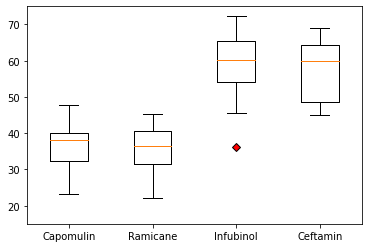

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot(tumor_volumes, labels=top_treatments, flierprops=red_diamond)
plt.ylim(15, 75)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

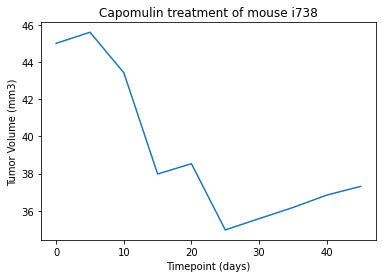

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
i738_data = combined_data[combined_data["Mouse ID"] == "i738"]

i738_data_df = i738_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

i738_volume = i738_data_df["Tumor Volume (mm3)"]
i738_timepoints = i738_data_df["Timepoint"]

plt.plot(i738_timepoints, i738_volume)
plt.title("Capomulin treatment of mouse i738")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

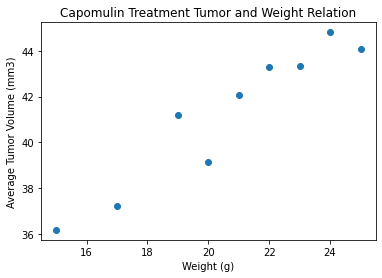

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]
capomulin_data_grouped = capomulin_data.groupby("Weight (g)")
average_tumor_by_weight = capomulin_data_grouped["Tumor Volume (mm3)"].mean()

x_axis = average_tumor_by_weight
y_axis = capomulin_data_grouped["Weight (g)"].unique()

plt.scatter(y_axis, x_axis)
plt.title("Capomulin Treatment Tumor and Weight Relation")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient 
average_df = pd.DataFrame(capomulin_data.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_df = average_df.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_df

column_1 = average_df["Weight (g)"]
column_2 = average_df["Average Volume"]
correlation = column_1.corr(column_2)
print("The correlation between mouse weight and average tumor volume is " + str(round(correlation, 2)))


The correlation between mouse weight and average tumor volume is 0.84


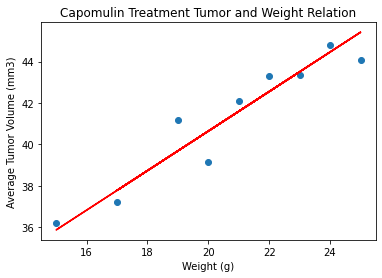

In [21]:
# Calculate linear regression model 
X = column_1.values.reshape(-1, 1)  # values converts it into a numpy array
Y = column_2.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(y_axis, x_axis)
plt.title("Capomulin Treatment Tumor and Weight Relation")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(X, Y_pred, color='red')
plt.show()